# eBridge - Data Preprocessing

## Master of Science in Electronics - Emphasis on Embedded Systems

## Costa Rica TEC

[eBridge Github Page](https://github.com/Anibalru/E-Bridge).  

Our goal is to identify patterns on CPU load behaviors.

## Data Preprocessing

First step is to load the libraries:

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt

### Load the dataset

The code below is used to load the dataset.

In [19]:
CoreData = pd.read_csv("Logs/RPI4-1/coreslog_2021-05-16_09-05.csv",dtype={"Time": "string", "1": np.int8,"2": np.int8,
                                                            "3": np.int8,"4": np.int8})

The following commands allows to have a preview of the dataset.

In [17]:
CoreData.head()

,Time,1,2,3,4
0,2021-05-16 09:05:42,100.0,0.0,100.0,0.0
1,2021-05-16 09:05:47,2.0,0.4,7.6,19.0
2,2021-05-16 09:05:52,0.8,0.6,66.5,20.5
3,2021-05-16 09:05:57,1.0,1.8,86.4,22.0
4,2021-05-16 09:06:02,1.2,6.0,86.1,16.9


Convert the time to timestamp

In [20]:
CoreData['Time'] = pd.to_datetime(CoreData['Time'])

In [21]:
CoreData.describe()

,1,2,3,4
count,27429.000000,27429.000000,27429.000000,27429.000000
mean,16.112563,21.412436,34.877079,36.778326
std,28.018721,30.115804,37.343692,37.617364
min,0.000000,0.000000,0.000000,0.000000
25%,0.200000,0.600000,5.000000,5.200000
50%,2.000000,7.800000,15.500000,16.900000
75%,16.100000,20.100000,87.500000,87.800000
max,100.000000,92.200000,100.000000,94.800000


In [35]:
CoreData['Time']

0       2021-05-16 09:05:42
1       2021-05-16 09:05:47
2       2021-05-16 09:05:52
3       2021-05-16 09:05:57
4       2021-05-16 09:06:02
                ...        
27424   2021-05-17 23:13:43
27425   2021-05-17 23:13:48
27426   2021-05-17 23:13:53
27427   2021-05-17 23:13:58
27428   2021-05-17 23:14:03
Name: Time, Length: 27429, dtype: datetime64[ns]

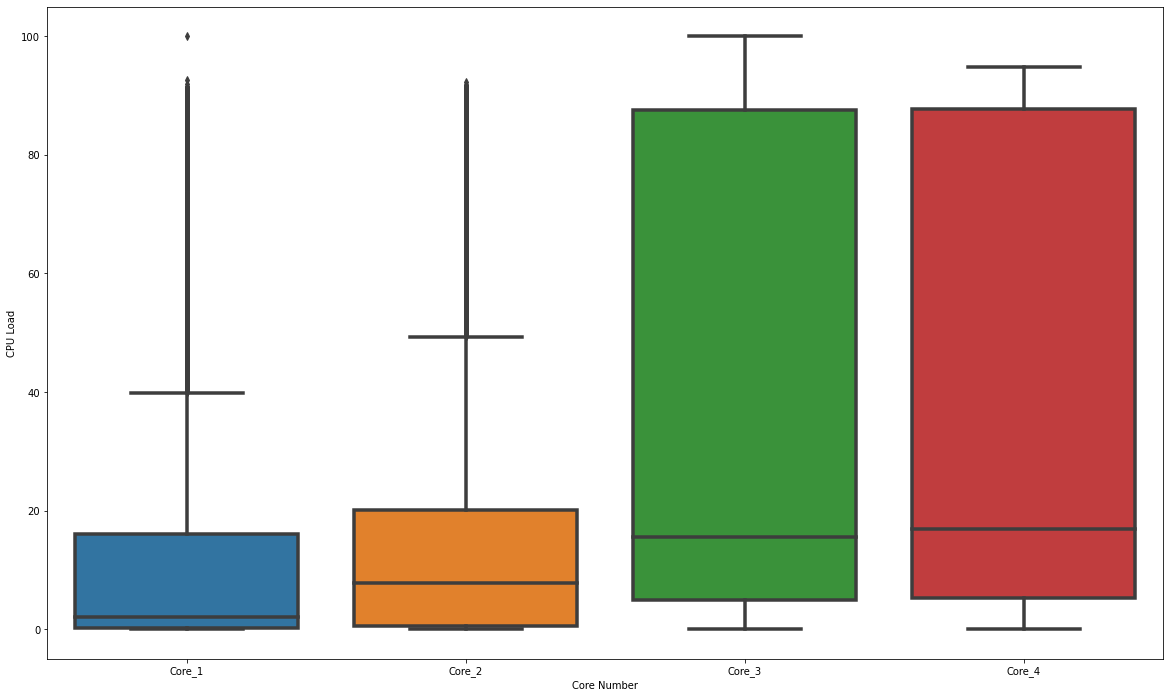

In [25]:
# Create Box Plots for Dataset

Core_Data = [CoreData['1'],CoreData['2'],
              CoreData['3'],CoreData['4']]
plt.figure(figsize=(20,12))
g = sns.boxplot(data=Core_Data, linewidth=3.5).set(xlabel='Core Number', ylabel='CPU Load')
plt.xticks(ticks = [0,1,2,3], labels = ['Core_1','Core_2','Core_3','Core_4'])
plt.show()

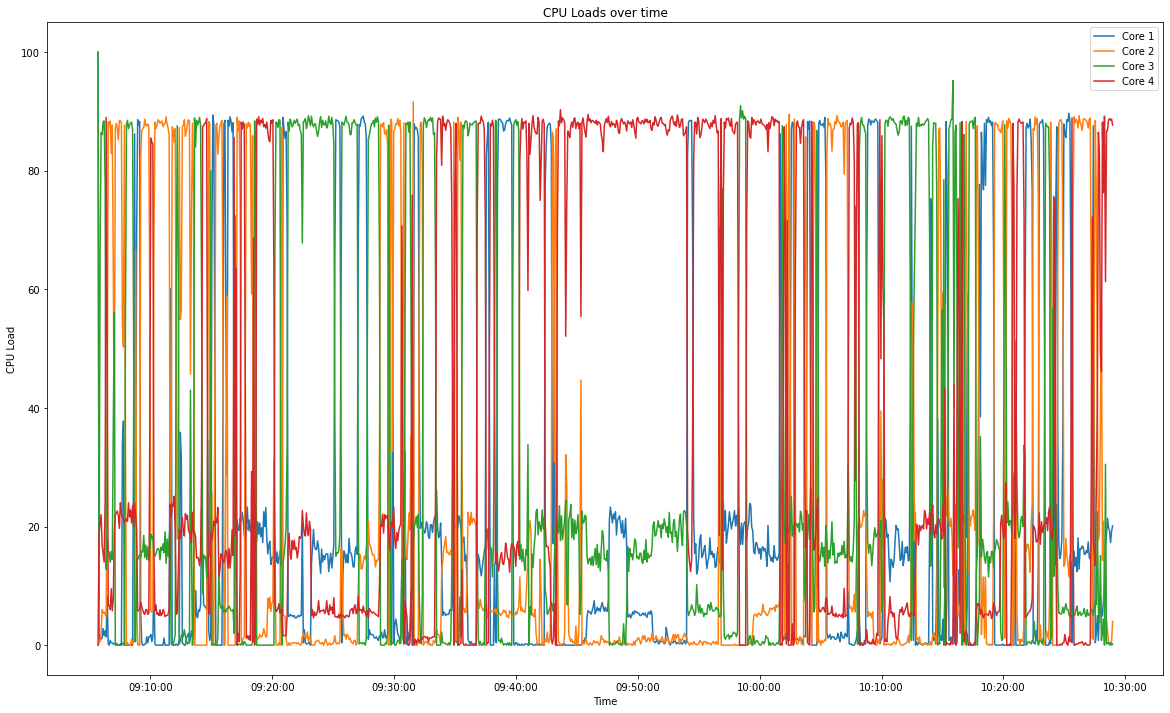

In [49]:
# Scatter Plot

import matplotlib.pyplot as plt
import matplotlib.dates as md

CoreData = CoreData[:999]

plt.figure(figsize=(20,12))
plt.plot(CoreData['Time'], CoreData['1'], label = "Core 1")
plt.plot(CoreData['Time'], CoreData['2'], label = "Core 2")
plt.plot(CoreData['Time'], CoreData['3'], label = "Core 3")
plt.plot(CoreData['Time'], CoreData['4'], label = "Core 4")
plt.xlabel('Time')
ax=plt.gca()
xfmt = md.DateFormatter('%H:%M:%S')
ax.xaxis.set_major_formatter(xfmt)
# Set the y axis label of the current axis.
plt.ylabel('CPU Load')
# Set a title of the current axes.
plt.title('CPU Loads over time')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

#g=sns.lineplot(data=CoreData)
#(g.set_axis_labels("Time", "CPU Load"))

#plt.show()